In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [49]:
data = pd.read_csv('../data/data.csv')
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [51]:
data.shape

(4600, 18)

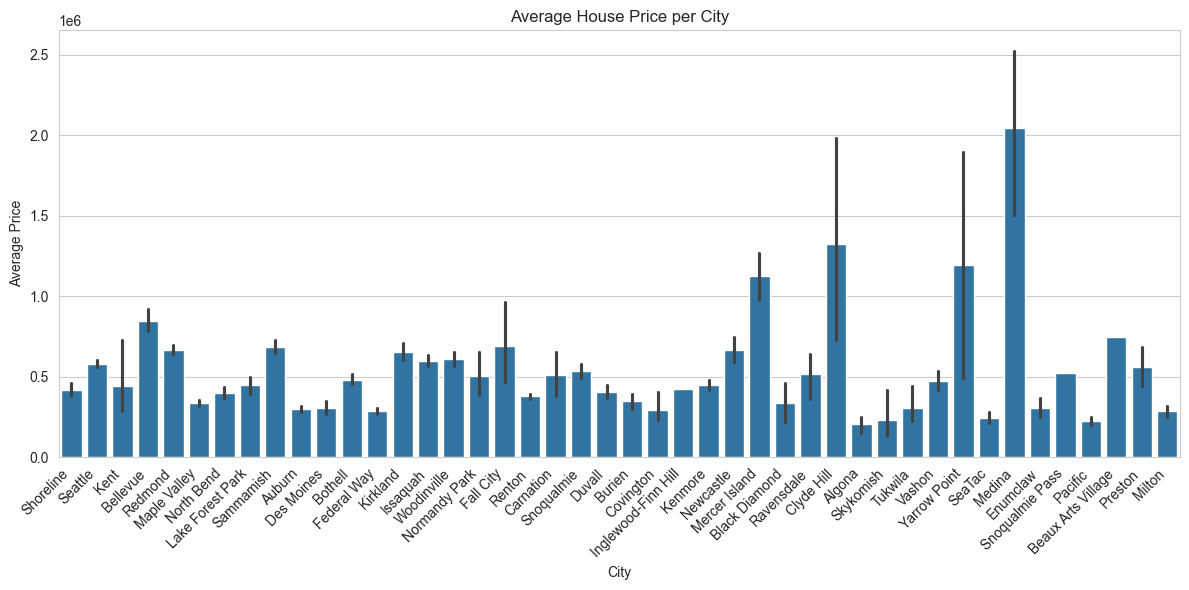

In [52]:
# Visualize average price per city

plt.figure(figsize=(12, 6))
sns.barplot(
    x="city",
    y="price",
    data=data,
    estimator=np.mean
)
plt.xticks(rotation=45, ha="right")
plt.title("Average House Price per City")
plt.xlabel("City")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()


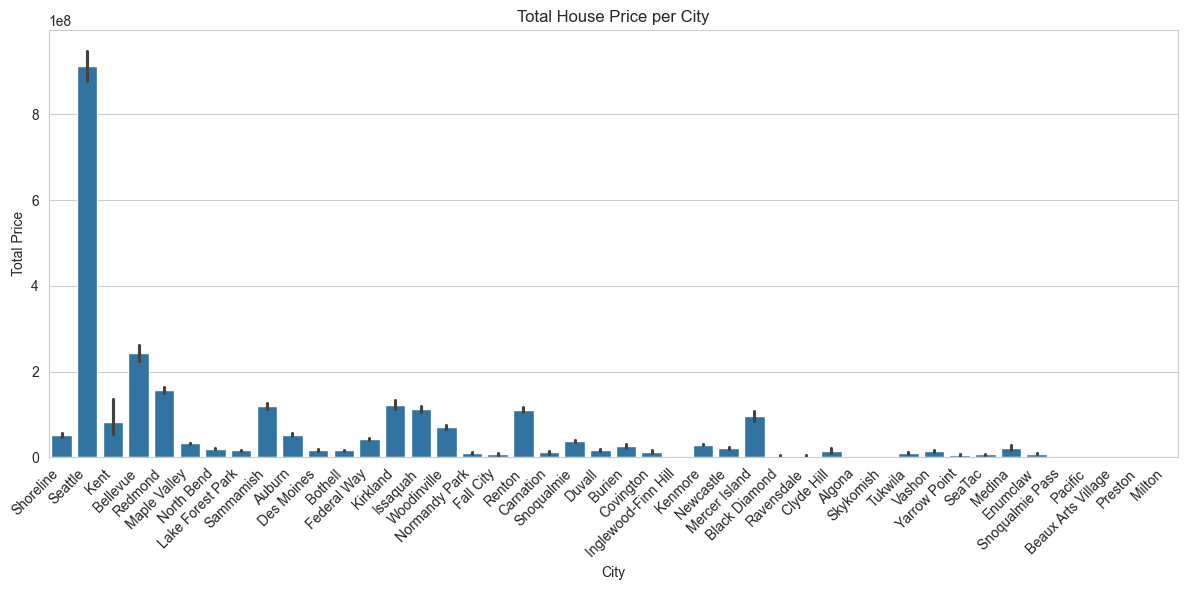

In [53]:
# Visualize total price per city
plt.figure(figsize=(12, 6))
sns.barplot(
    x="city",
    y="price",
    data=data,
    estimator=np.sum
)
plt.xticks(rotation=45, ha="right")
plt.title("Total House Price per City")
plt.xlabel("City")
plt.ylabel("Total Price")
plt.tight_layout()
plt.show()


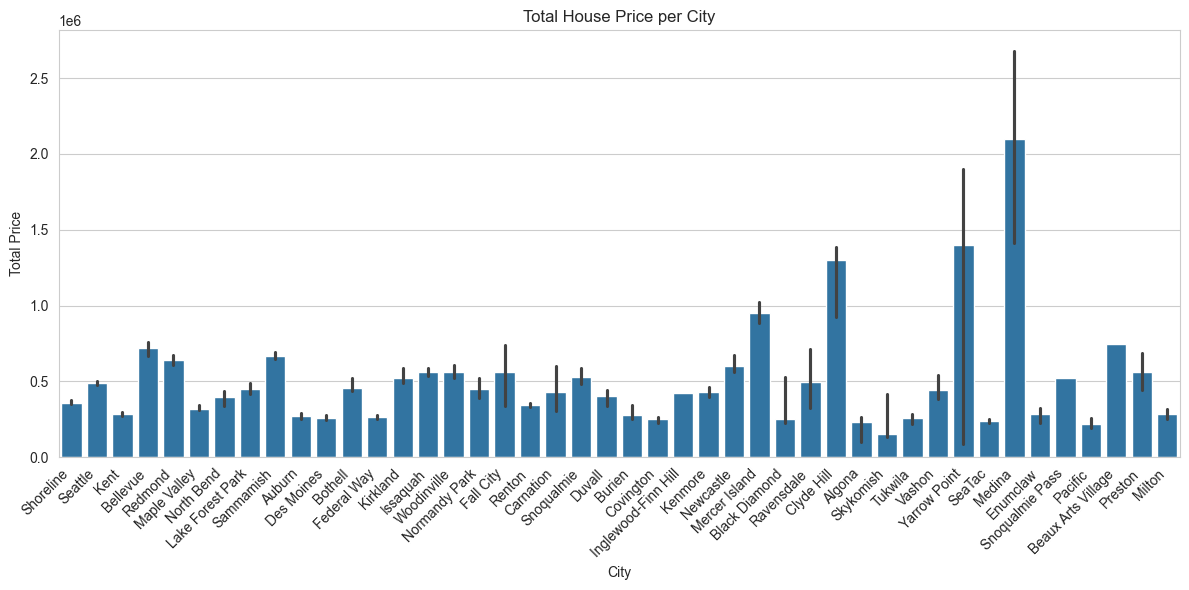

In [54]:
# Visualize total price per city
plt.figure(figsize=(12, 6))
sns.barplot(
    x="city",
    y="price",
    data=data,
    estimator=np.median
)
plt.xticks(rotation=45, ha="right")
plt.title("Total House Price per City")
plt.xlabel("City")
plt.ylabel("Total Price")
plt.tight_layout()
plt.show()


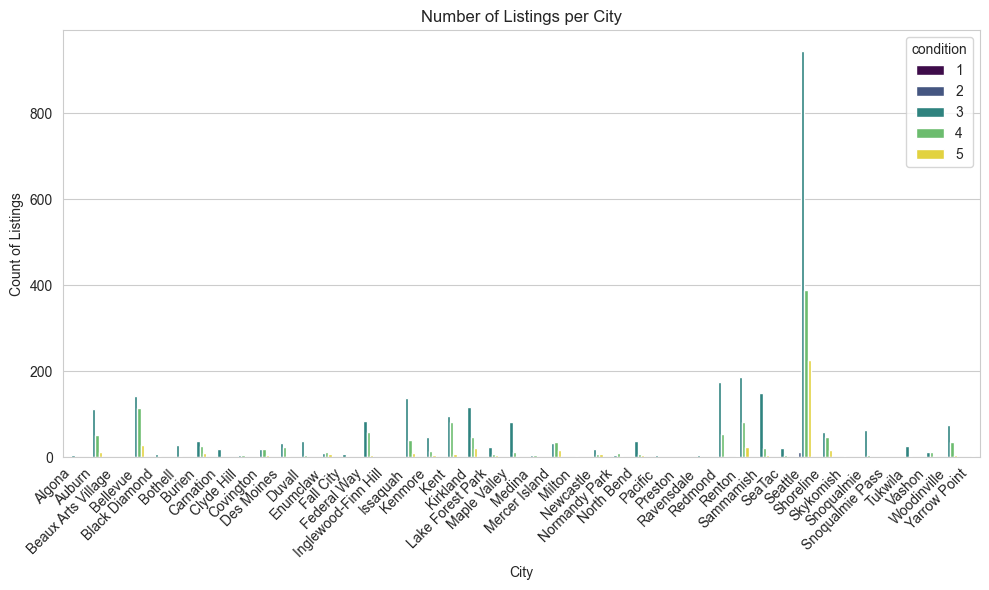

In [55]:
plt.figure(figsize=(10,6))

city_cond = (
    data
      .groupby(["city", "condition"])
      .size()
      .reset_index(name="count")
)

sns.barplot(
    x="city",
    y="count",
    hue="condition",
    data = city_cond,
    palette="viridis"
)
plt.xticks(rotation=45, ha="right")
plt.title("Number of Listings per City")
plt.xlabel("City")
plt.ylabel("Count of Listings")
plt.tight_layout()
plt.show()


<Axes: xlabel='price', ylabel='bedrooms'>

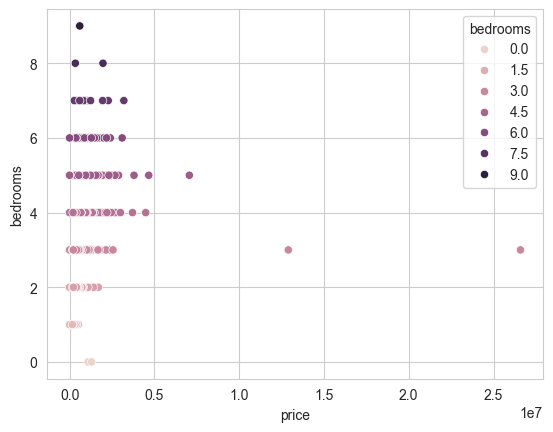

In [56]:
sns.scatterplot(x="price", y="bedrooms", data=data, hue="bedrooms")

<Figure size 1000x600 with 0 Axes>

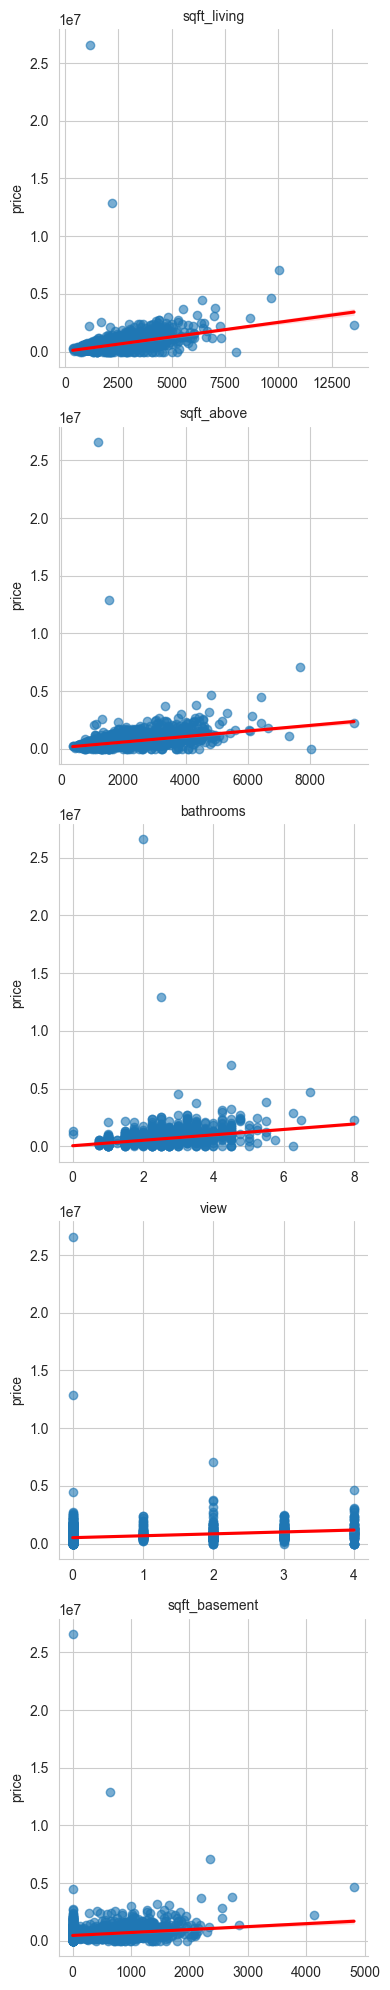

In [57]:
plt.figure(figsize=(10, 6))

corr = data.corr(numeric_only=True)
top_features = corr["price"].drop("price").abs().sort_values(ascending=False).head(5).index.tolist()

melted = data.melt(
    id_vars="price",
    value_vars=top_features,
    var_name="feature",
    value_name="value"
)

g = sns.FacetGrid(
    melted,
    col="feature",
    col_wrap=1,
    height=4,
    sharex=False
)

g.map(
    sns.regplot,
    "value", "price",
    scatter_kws={"alpha":0.6},
    line_kws={"color":"red"}
)

g.set_axis_labels("", "price")
g.set_titles("{col_name}")

# Tidy up spacing
g.fig.tight_layout(w_pad=1.0, h_pad=1.2)
plt.show()


C:\Users\Mile.Stanislavov\AppData\Local\Temp\ipykernel_24804\4030724113.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


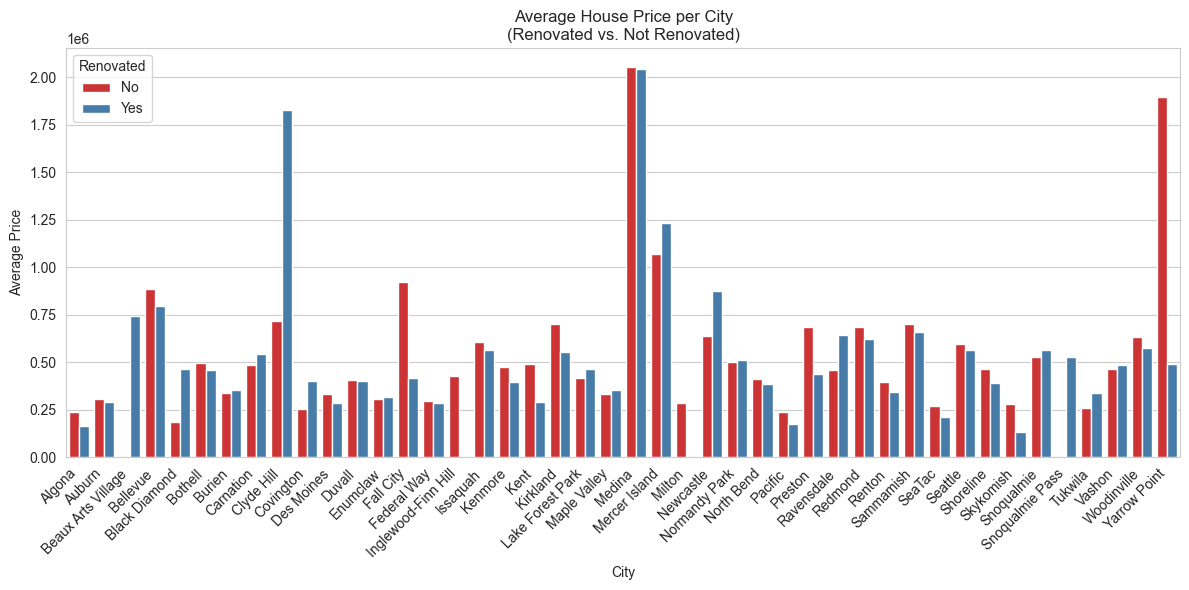

In [58]:
data_copy = data.copy()

data_copy["renovated"] = data_copy["yr_renovated"].apply(lambda yr: "Yes" if yr > 0 else "No")

avg_price = (
    data_copy
      .groupby(["city", "renovated"])["price"]
      .mean()
      .reset_index()
)

# 3) Plot it
plt.figure(figsize=(12, 6))
sns.barplot(
    x="city",
    y="price",
    hue="renovated",
    data=avg_price,
    palette="Set1",
    ci=None
)
plt.xticks(rotation=45, ha="right")
plt.title("Average House Price per City\n(Renovated vs. Not Renovated)")
plt.xlabel("City")
plt.ylabel("Average Price")
plt.legend(title="Renovated")
plt.tight_layout()
plt.show()


C:\Users\Mile.Stanislavov\AppData\Local\Temp\ipykernel_24804\3734586269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


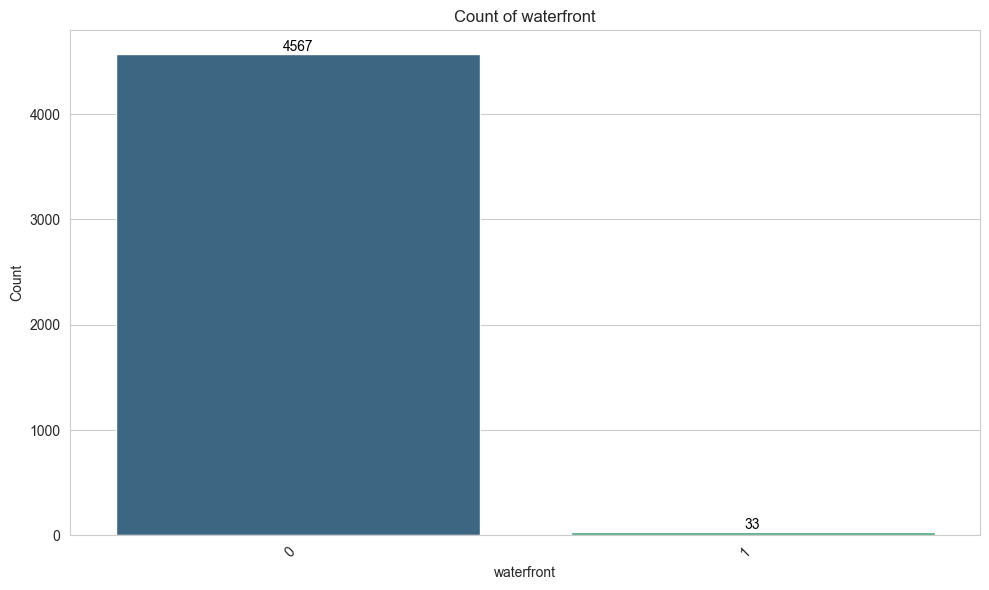

In [59]:
plt.figure(figsize=(10,6))
ax = sns.countplot(
    x="waterfront",
    data=data,
    order=data["waterfront"].value_counts().index, 
    palette="viridis"
)

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10, color='black')


plt.xticks(rotation=45, ha="right")
plt.title("Count of " + "waterfront")
plt.xlabel("waterfront")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [60]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [61]:
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### 2.1 Feature selection
In the following cell, based on our domain knowledge and the data visualization, we are going to drop some unnecessary features

In [62]:
data = data.drop('country',axis=1)
data = data.drop('street',axis=1)
data = data.drop('date',axis=1)
data = data.drop('waterfront',axis=1)
to_drop = data.index[data["price"] > 10_000_000]
data = data.drop(index = to_drop)

### 2.2 Feature encoding
Two features are in need of encoding, city and statezip, so we are going to look for an adequate method to do this procedure

In [63]:
print(data["statezip"].unique())
print(data["statezip"].value_counts())

['WA 98133' 'WA 98119' 'WA 98042' 'WA 98008' 'WA 98052' 'WA 98115'
 'WA 98038' 'WA 98045' 'WA 98155' 'WA 98105' 'WA 98074' 'WA 98106'
 'WA 98007' 'WA 98092' 'WA 98198' 'WA 98006' 'WA 98102' 'WA 98011'
 'WA 98125' 'WA 98003' 'WA 98136' 'WA 98033' 'WA 98029' 'WA 98117'
 'WA 98034' 'WA 98072' 'WA 98023' 'WA 98107' 'WA 98166' 'WA 98116'
 'WA 98024' 'WA 98055' 'WA 98077' 'WA 98027' 'WA 98059' 'WA 98075'
 'WA 98014' 'WA 98065' 'WA 98199' 'WA 98053' 'WA 98058' 'WA 98122'
 'WA 98103' 'WA 98112' 'WA 98005' 'WA 98118' 'WA 98177' 'WA 98004'
 'WA 98019' 'WA 98144' 'WA 98168' 'WA 98001' 'WA 98056' 'WA 98146'
 'WA 98028' 'WA 98148' 'WA 98057' 'WA 98040' 'WA 98010' 'WA 98051'
 'WA 98031' 'WA 98109' 'WA 98030' 'WA 98126' 'WA 98032' 'WA 98178'
 'WA 98288' 'WA 98108' 'WA 98070' 'WA 98188' 'WA 98002' 'WA 98039'
 'WA 98022' 'WA 98068' 'WA 98047' 'WA 98050' 'WA 98354']
statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA

#### Transforming the data from string to integer by stripping away the text from the 'statezip' and leaving the unique number

In [64]:

data['statezip'] = data['statezip'].str.replace(r'^WA\s*', '', regex=True).str.strip()
data['statezip'] = pd.to_numeric(data['statezip'], errors='coerce')

In [65]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,Shoreline,98133
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,Seattle,98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,Kent,98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,Bellevue,98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,Redmond,98052


#### Encoding the cities ordinally based on the average price of all the houses within a city

In [66]:
city_avg = data.groupby("city")["price"].mean()

city_rank = city_avg.sort_values().reset_index()

# Create a mapping: city name → ordinal rank
# We’ll start ranks at 1 for the least expensive city
city_rank["rank"] = range(1, len(city_rank) + 1)
mapping = dict(zip(city_rank["city"], city_rank["rank"]))

#Apply that mapping to your DataFrame
data["city_ordinal"] = data["city"].map(mapping)

# Quick check
print(data[["city","city_ordinal"]].drop_duplicates().head())

        city  city_ordinal
0  Shoreline            19
1    Seattle            31
2       Kent             8
3   Bellevue            40
4    Redmond            36


In [67]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,city_ordinal
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,Shoreline,98133,19
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,Seattle,98119,31
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,Kent,98042,8
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,Bellevue,98008,40
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,Redmond,98052,36


In [68]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,city_ordinal
count,4.598000e+03,4598.000000,4598.000000,4598.000000,4.598000e+03,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000
mean,5.436148e+05,3.401044,2.160776,2139.544585,1.485480e+04,1.512288,0.240757,3.451718,1827.466507,312.078077,1970.784906,808.524793,98079.364289,26.374511
std,3.705838e+05,0.909007,0.783932,963.312203,3.589205e+04,0.538299,0.778558,0.677296,862.293944,464.190168,29.735870,979.397082,53.119578,10.452864
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,1.000000
25%,3.226250e+05,3.000000,1.750000,1460.000000,5.000250e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,16.000000
50%,4.604435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,98072.000000,31.000000
75%,6.537500e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,98117.000000,33.000000
max,7.062500e+06,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,98354.000000,44.000000


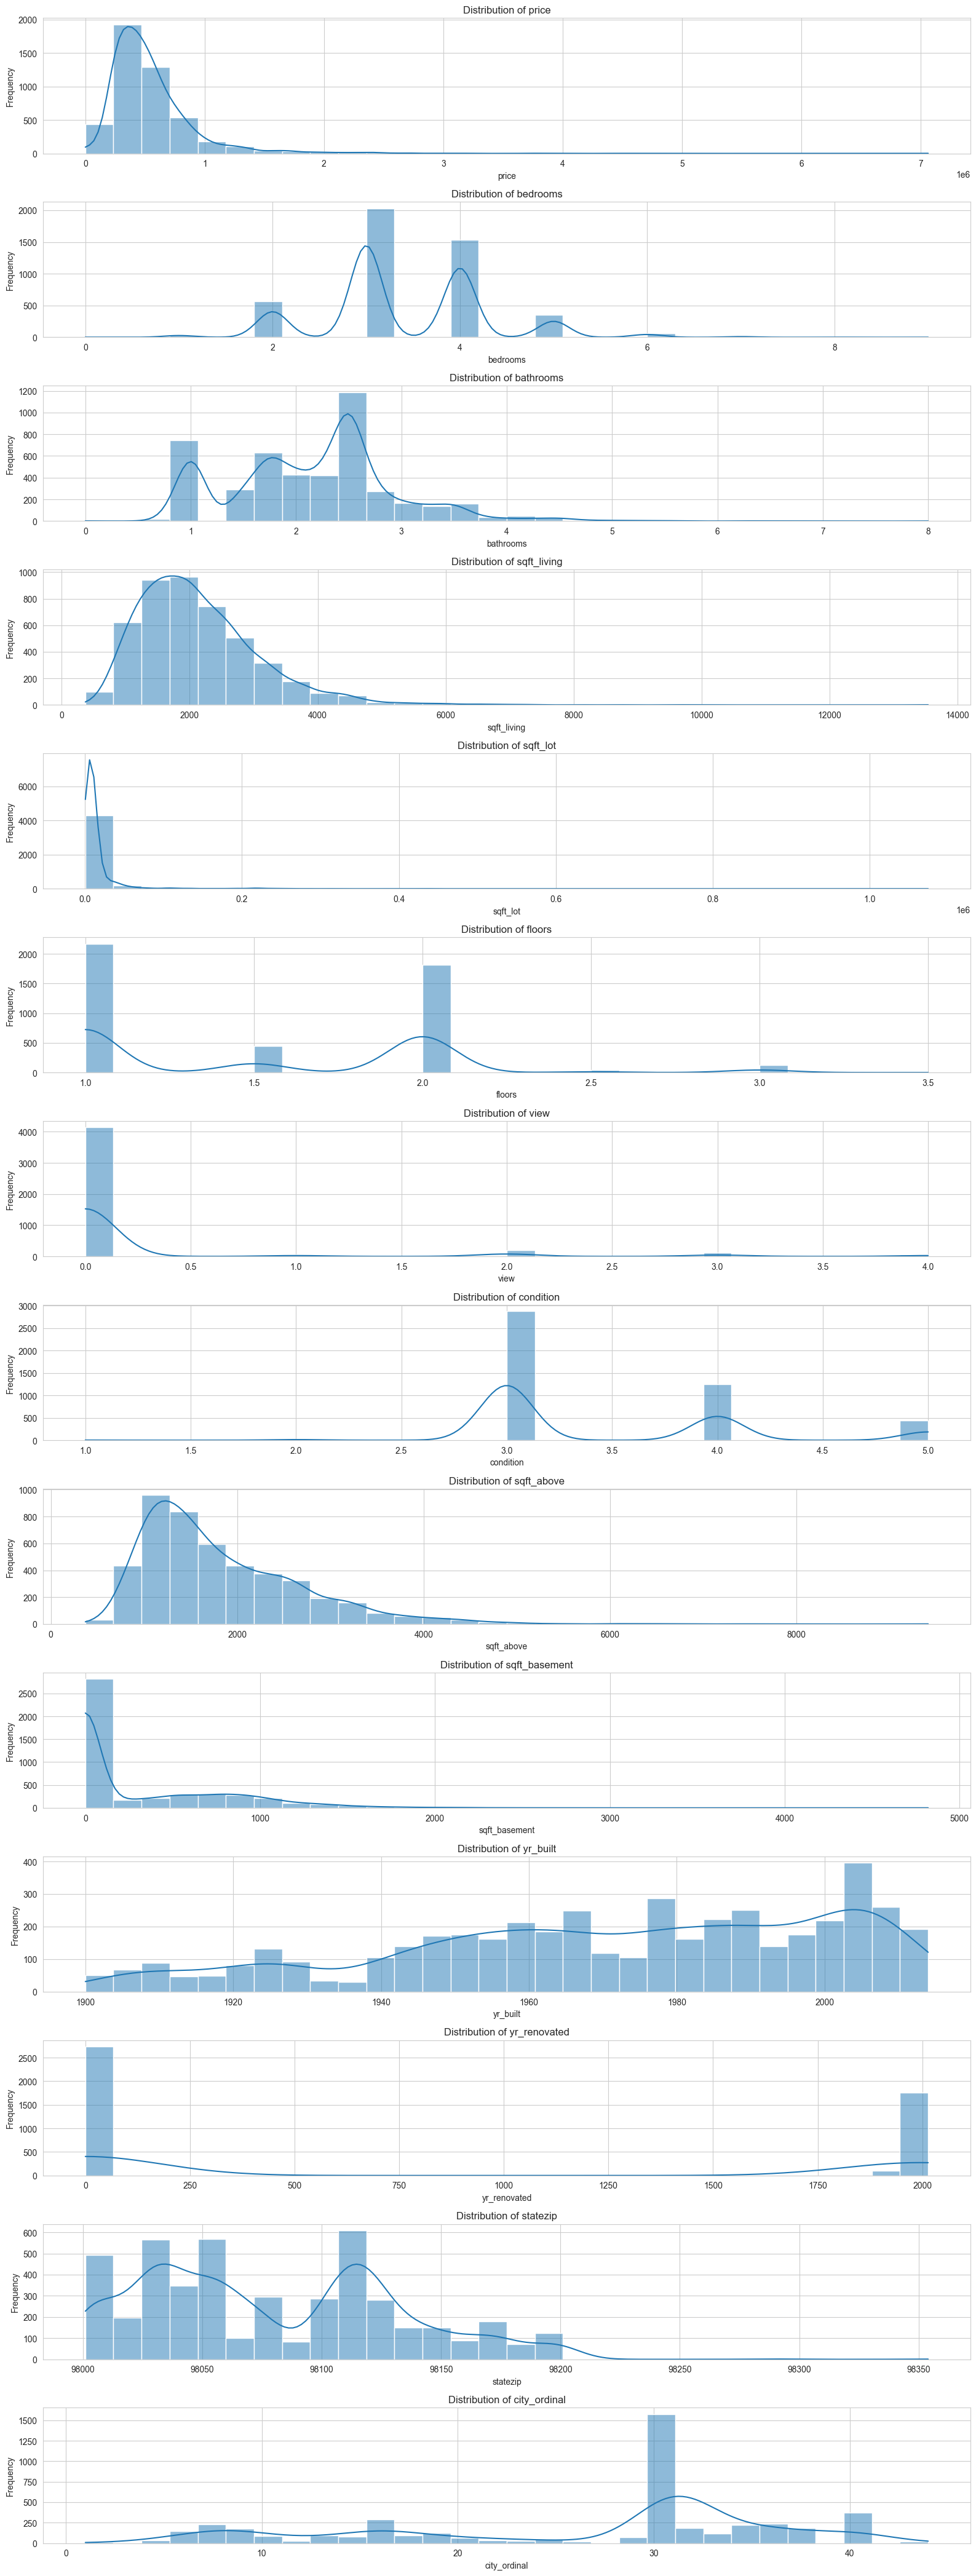

In [69]:
numeric_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(16, 3 * len(numeric_cols)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [70]:
ss = StandardScaler()

numeric_cols = [ 'sqft_living','sqft_above' ]

for col in numeric_cols:
    data[col + '_scaled'] = ss.fit_transform(data[[col]])
data = data.drop(numeric_cols, axis=1)

In [71]:
ns = MinMaxScaler()

numeric_cols = ['yr_built', 'yr_renovated', 'sqft_basement', 'sqft_lot'] 

for col in numeric_cols:
    data[col + '_scaled'] = ns.fit_transform(data[[col]])
data = data.drop(numeric_cols, axis=1)

In [72]:
data.head()

,price,bedrooms,bathrooms,floors,view,condition,city,statezip,city_ordinal,sqft_living_scaled,sqft_above_scaled,yr_built_scaled,yr_renovated_scaled,sqft_basement_scaled,sqft_lot_scaled
0,313000.0,3.0,1.50,1.5,0,3,Shoreline,98133,19,-0.830086,-0.565375,0.482456,0.995531,0.000000,0.006775
1,2384000.0,5.0,2.50,2.0,4,5,Seattle,98119,31,1.568152,1.789067,0.184211,0.000000,0.058091,0.007835
2,342000.0,3.0,2.00,1.0,0,4,Kent,98042,8,-0.217549,0.118921,0.578947,0.000000,0.000000,0.010534
3,420000.0,3.0,2.25,1.0,0,4,Bellevue,98008,40,-0.144875,-0.959715,0.552632,0.000000,0.207469,0.006885
4,550000.0,4.0,2.50,1.0,0,4,Redmond,98052,36,-0.207167,-0.797340,0.666667,0.989076,0.165975,0.009186


#### Generating a correlation matrix

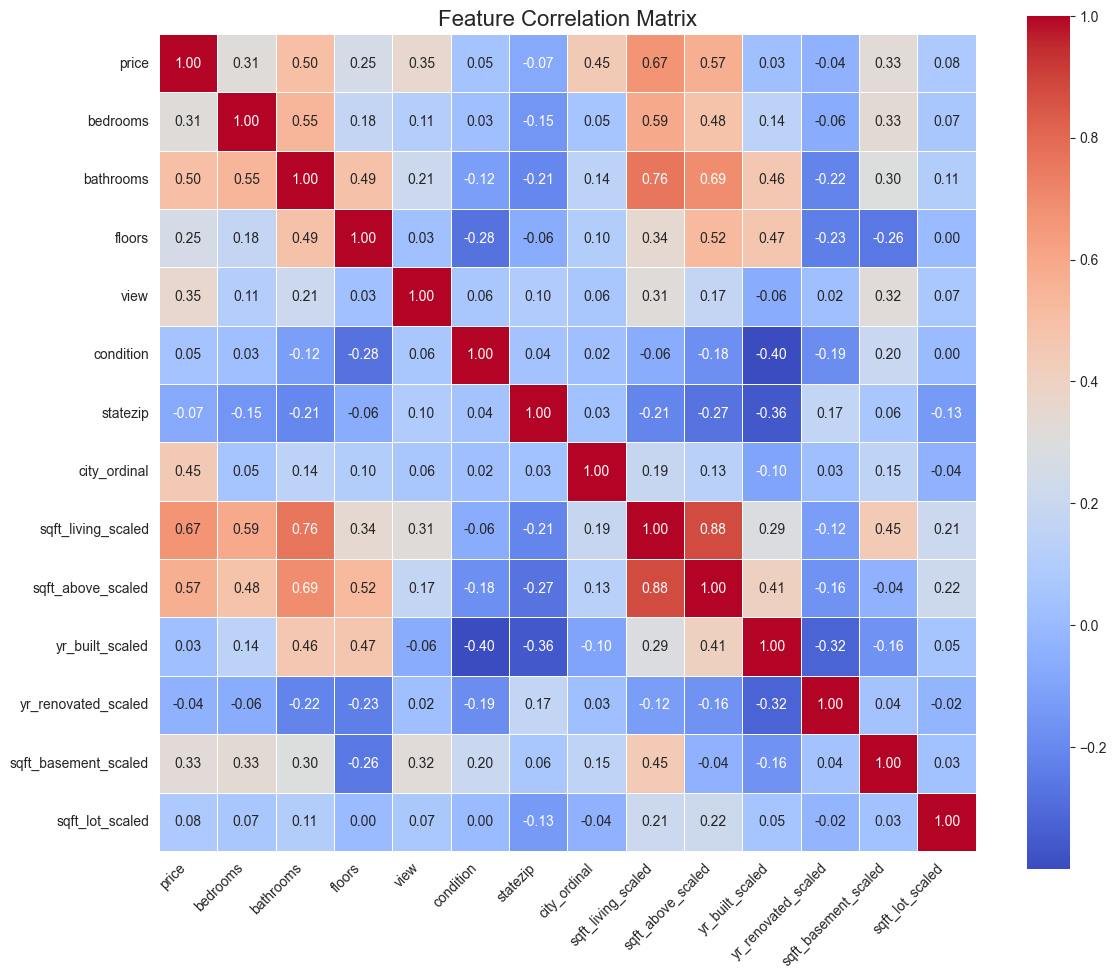

In [73]:
data_correlation = data.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(
    data_correlation,
    annot=True,        # show the correlation numbers
    fmt=".2f",         # 2 decimal places
    cmap="coolwarm",   # diverging color map
    square=True,       # make cells square
    linewidths=0.5     # lines between cells
)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [74]:
data.to_csv('../data/cleaned_data.csv', index=False)
print("Data cleaning and visualization complete. Cleaned data saved to '../data/cleaned_data.csv'.")

Data cleaning and visualization complete. Cleaned data saved to '../data/cleaned_data.csv'.
